# ML Final Project

This project aims to classify patients with different types of thyroid related disease given their age, sex, and medical information – including test results for thyroid hormone levels in blood. The data was obtained from [this UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/thyroid+disease). The repository contains several text files with different subsets of the data. One of them contains information for ~9000 unique patients along with a medical diagnosis out of 20 possible classes. Those classes make up 7 distinct diagnosis types:
- `negative diagnosis`
- `hyperthyroid conditions`
- `hypothyroid conditions`
- `binding protein`
- `non-thyroidal`
- `undergoing replacement therapy`
- `discordant results`

The different target diagnoses were mapped to one of these classes at the moment import to the notebook. Some inconclusive diagnoses were dropped given that they make up less than 3% of all cases present in the dataset.

Moving forward with the analysis we have decided to only keep the observations for patients with diagnosis either `negative`, `hyperthyroid`, or `hypothyroid`. This is because they are the most prevalent observations and the focus of this project. The other classes were dropped from the dataset upon import and thus we are left with ~7500 unique entries in the dataset.
- The main reason for dropping the other classes is that they are not important to our focus because either they dont relate thyroid disease per-se (for example `non-thyroidal`, `discordant results`), or they refer to a treatment (for example `undergoing replacement therapy`).
- Another big, probably more important, reason is that they create niose in our data.
    - Our most important attributes are the blood test results of hormone levels. The other target classes referring to treatments and other conditions blurr barriers between classes. We believe they belong in a different analysis with a slightly different focus.

### Preliminary Thyroid Disease Research

Before beginning our analysis, it is extremely important to understand the nature of our data. This doesnt only mean knowing what the distributions and correlations are within our variables. This also means we should be familiar with the topic as well as the significance of the information we have and what normal values look like, theoretically, for the average person in the world.
- What is Thyroid Disease?
- What is TSH measurement? What are scientifically established normal values?
    - A high TSH level indicates that the thyroid gland is not making enough thyroid hormone (primary hypothyroidism). On the other hand, a low TSH level usually indicates that the thyroid is producing too much thyroid hormone (hyperthyroidism). 
        - TSH normal values are 0.5 to 5.0 mIU/L
- What is T3 measurement? What are scientifically established normal values?
    - A Total T3 test measures the bound and free fractions of triiodothyronine. Hyperthyroid patients typically have an elevated Total T3 level. T3 tests can be used to support a diagnosis of hyperthyroidism and can determine the severity hyperthyroidism.
        - A normal Total T3 level in adults ranges from 80-220 ng/dL
- What is TT4 measurement? What are scientifically established normal values?
    - A Total T4 test measures the bound and free thyroxine (T4) hormone in the blood. Total T4 levels are affected by medications and medical conditions that change thyroid hormone binding proteins. Estrogen, oral contraceptive pills, pregnancy, liver disease, and hepatitis C virus infection are common causes of increased thyroid hormone binding proteins and will result in a high Total T4. Oppositely, Testosterone or androgens and anabolic steroids are common causes of decreased thyroid hormone binding proteins and will result in a low Total T4.
        - A normal Total T4 level in adults ranges from 5.0 to 12.0μg/dL
- What is T4U measurement? What are scientifically established normal values?
    - T4U tests measure thyroxine (T4) utilization rate in the body. They can help measure how well the body is utilizing T4 hormone.
- What is FTI measurement? What are scientifically established normal values?
    - A Free T4 Index measures what is not bound and able to freely enter and affect the body tissues. Tests measuring free T4 index (FTI) usually more accurately reflect how the thyroid gland is functioning.
        - FT4 normal values are 0.7 to 1.9ng/dL

We do not know the units that the different hormone blood measurements in our dataset use. But knowing about what these levels are usually for individuals can help us tremendously in understanding our dataset. As well as making hypothesis of the units that are used in the dataset and detecting Outliers/ inconsistencies.

Now that we have this information, let us begin with the analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing dataset from persistent landing
thyroidDF = pd.read_csv('data/thyroidDF.csv') # thyroidDF.csv

# dropping redundant attributes from thyroidDF dataset
thyroidDF.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)

# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative',
                'A': 'hyper', 
                'B': 'hyper', 
                'C': 'hyper', 
                'D': 'hyper',
                'E': 'hypo', 
                'F': 'hypo', 
                'G': 'hypo', 
                'H': 'hypo'}

thyroidDF['target'] = thyroidDF['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
thyroidDF.dropna(subset=['target'], inplace=True) 

# dataset summary
thyroidDF.info()
thyroidDF.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7546 non-null   int64  
 1   sex                  7296 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   query_hypothyroid    7546 non-null   object 
 10  query_hyperthyroid   7546 non-null   object 
 11  lithium              7546 non-null   object 
 12  goitre               7546 non-null   object 
 13  tumor                7546 non-null   object 
 14  hypopituitary        7546 non-null   object 
 15  psych                7546 non-null   o

,age,TSH,T3,TT4,T4U,FTI,TBG
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000,259.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745,22.955019
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867,6.088392
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.100000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000,20.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000,23.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000,27.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000,45.000000


### Initial Thoughts

The columns listed below were removed because of redundacy. They are boolean and state whether or not a value has been recorded for their respective blood tests. If a value has been recorded for a blood test, it will be present in its column. Otherwise, it will be null.
- `TSH_measured`
- `T3_measured`
- `TT4_measured`
- `T4U_measured`
- `FTI_measured`
- `TBG_measured`

The `patient_id` attribute was also removed after checking for duplicate observations because it provides no use to us moving forward.

**Observations:**
- Max age value is 65,526 years old. Either that person is really really old or this is a mistake. There are likely more inconsistencies like this one throughout the data. Let's check them!
    - Persons with age above 100 will be removed since they have 'target' negative and we wont be losing to much information by omitting them
- Some Max values for Thyroid Hormone tests looks suspicious.
    - We will deal with these later while detecting and handling outliers

In [2]:
thyroidDF[thyroidDF.age > 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,1.10,2.0,118.0,1.13,104.0,NaN,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,0.38,2.0,113.0,1.08,104.0,NaN,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,0.03,2.8,112.0,0.84,133.0,NaN,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,1.50,NaN,132.0,1.02,129.0,NaN,negative


In [3]:
# changing age of observations with ('age' > 100) to null
thyroidDF['age'] = thyroidDF['age'].astype('int64') # change type to int
thyroidDF['age'] = np.where((thyroidDF.age > 100), np.nan, thyroidDF.age) 

---
## Exploratory Data Analysis

We begin our EDA by looking at the distribution of Hormone levels in blood for each of our target classes. This helps us get an idea for how good of a predictor each of these attributes can be


<AxesSubplot:xlabel='target', ylabel='TBG'>

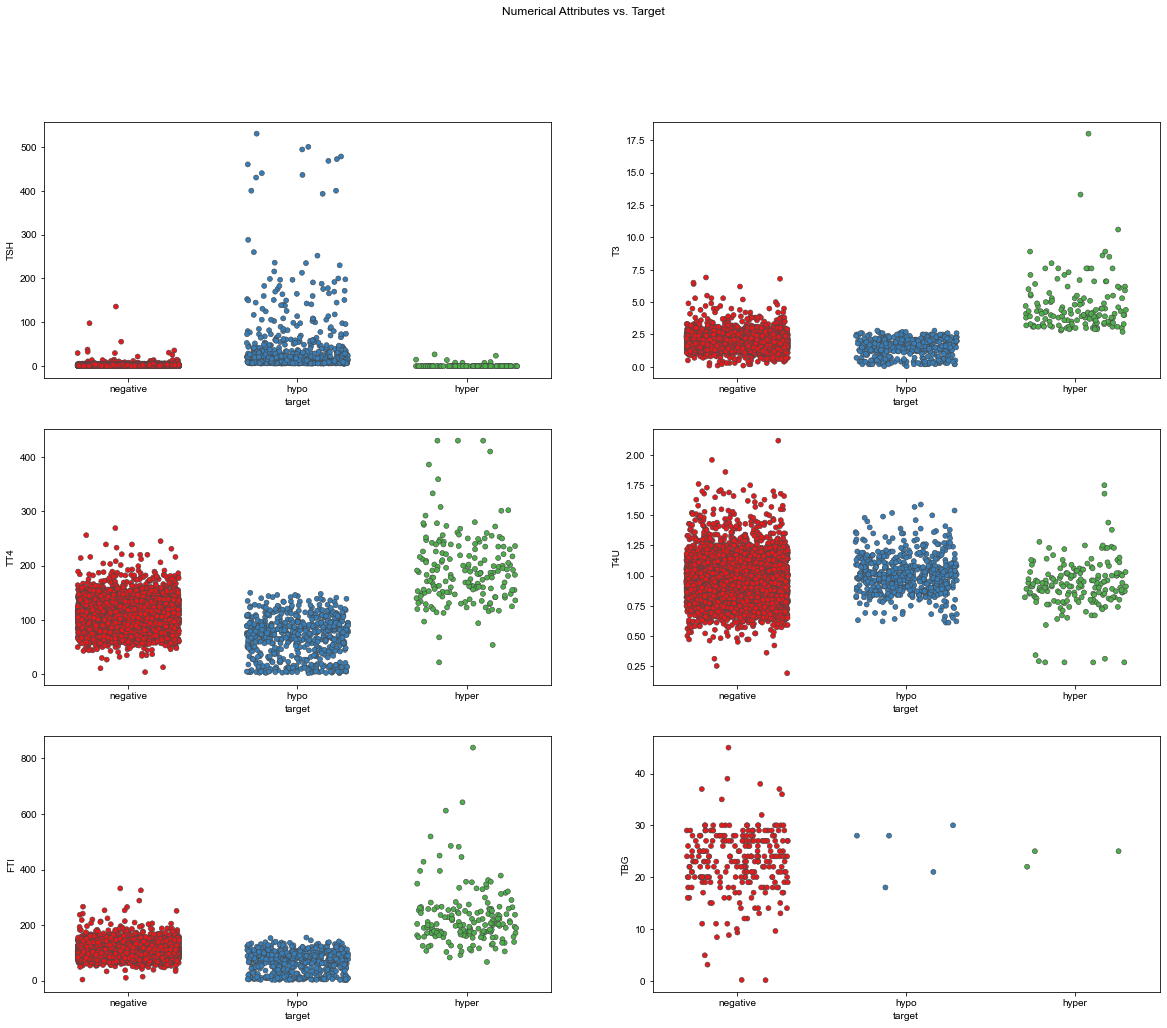

In [4]:
# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_theme(style='ticks')

# TSH vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TSH, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.T3, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TT4, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.T4U, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.FTI, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=thyroidDF.target, y=thyroidDF.TBG, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[2, 1])


**Observations:**
- Immediately we can hypothesize that `FTI`, `T3`, and `TT4` will be good feature additions to our models. `TSH` looks like it might be good as well but we need to handle the outliers for `'target'` hypo and analyze the attribute distribution further before making any decisions.
    - This is all in-line with the knowledge discovered about Hormone level tests during our initial research

Let's continue by creating a pairplot of our numeric variables and seeing if we can spot any clusters forming between variables.

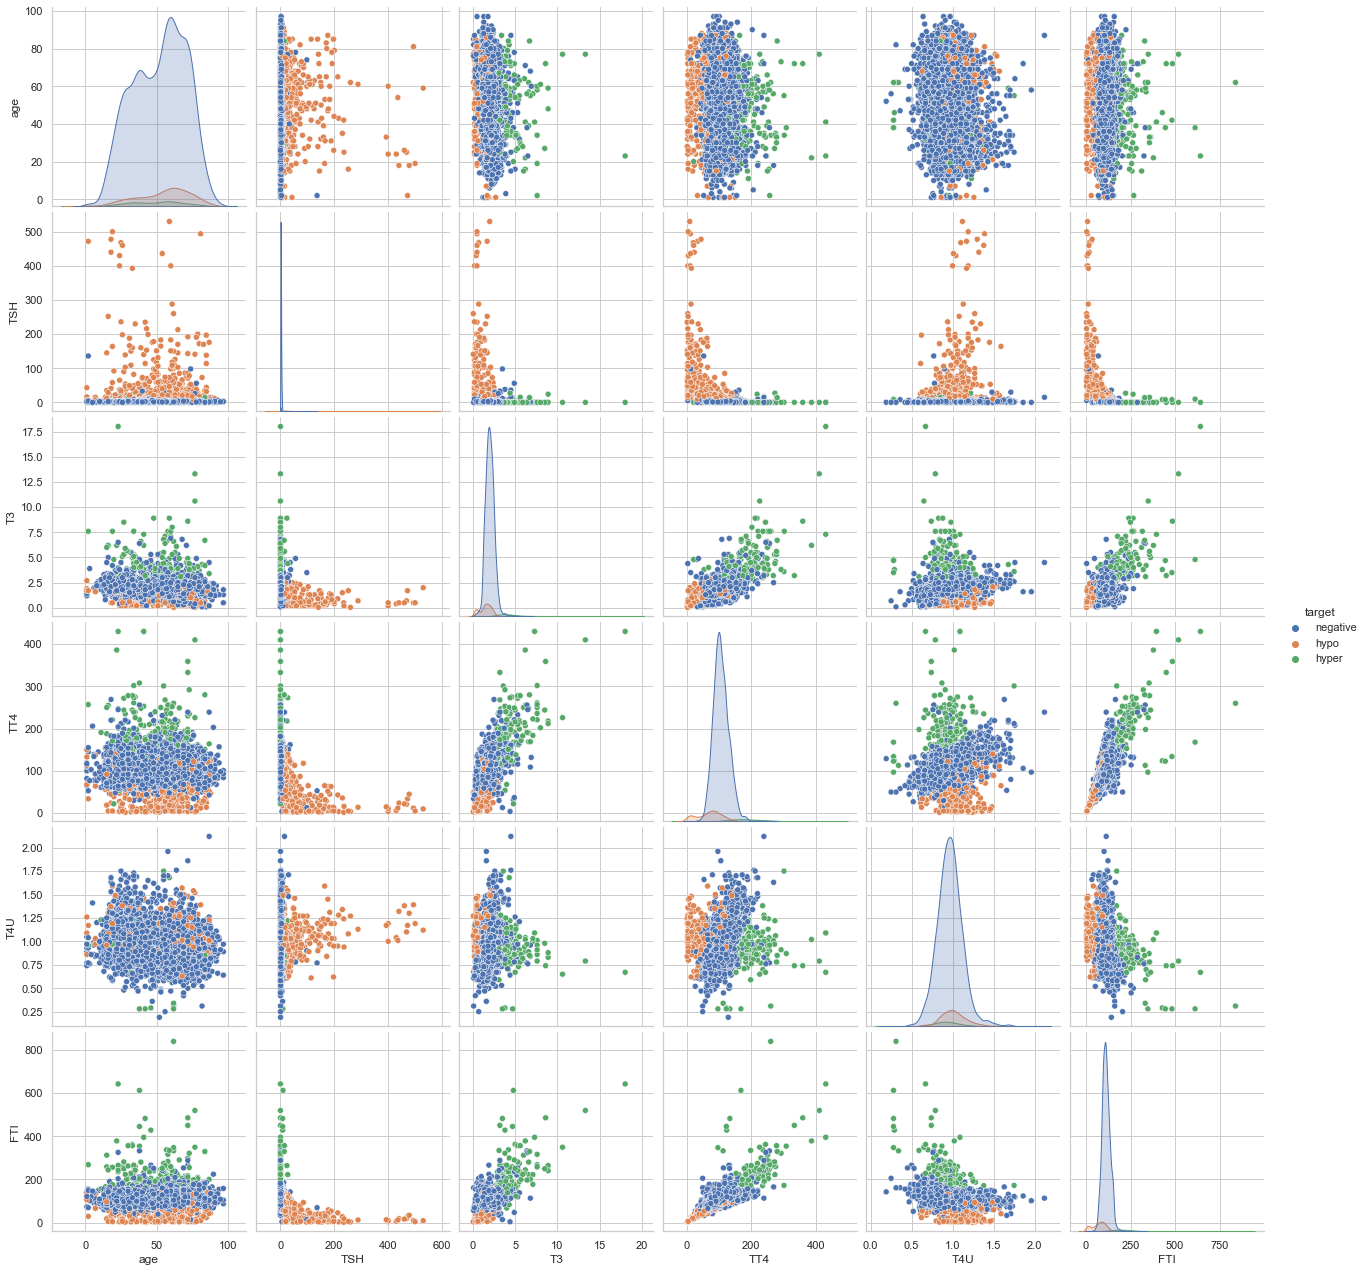

In [5]:
numericalDF = thyroidDF[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid');
sns.pairplot(numericalDF, hue='target', height=3);
plt.show()

In the diagonals of the pairplot we can see the distributions of each numeric variable with respect to one another. It is apparent how unbalanced the dataset is, with so many negative 'target' compared to hypothyroid or hyperthyroid.

**Observations:**
- We can see that for some Hormone test vs others there are nice clusters that form. This is encouragin because it means that they do a good job at separating out each of our target classes.
    - `FTI` vs `T3`
    - `FTI` vs `T4U`
    - `FTI` vs `age`
    - `T4U` vs `TT4`
    - `TT4` vs `age`
    - `TT4` vs `T3`
- There is severe target class imbalance... but we knew this from the start. It is normal for this type of data. We will have to treat with resampling protocol as well as using models that handle this well
    - XGBoost would be a good option

#### Investigating Feature Importance

Now lets give some love to our other bolean attributes and take a look at the correlation between all of our attributes between one another.

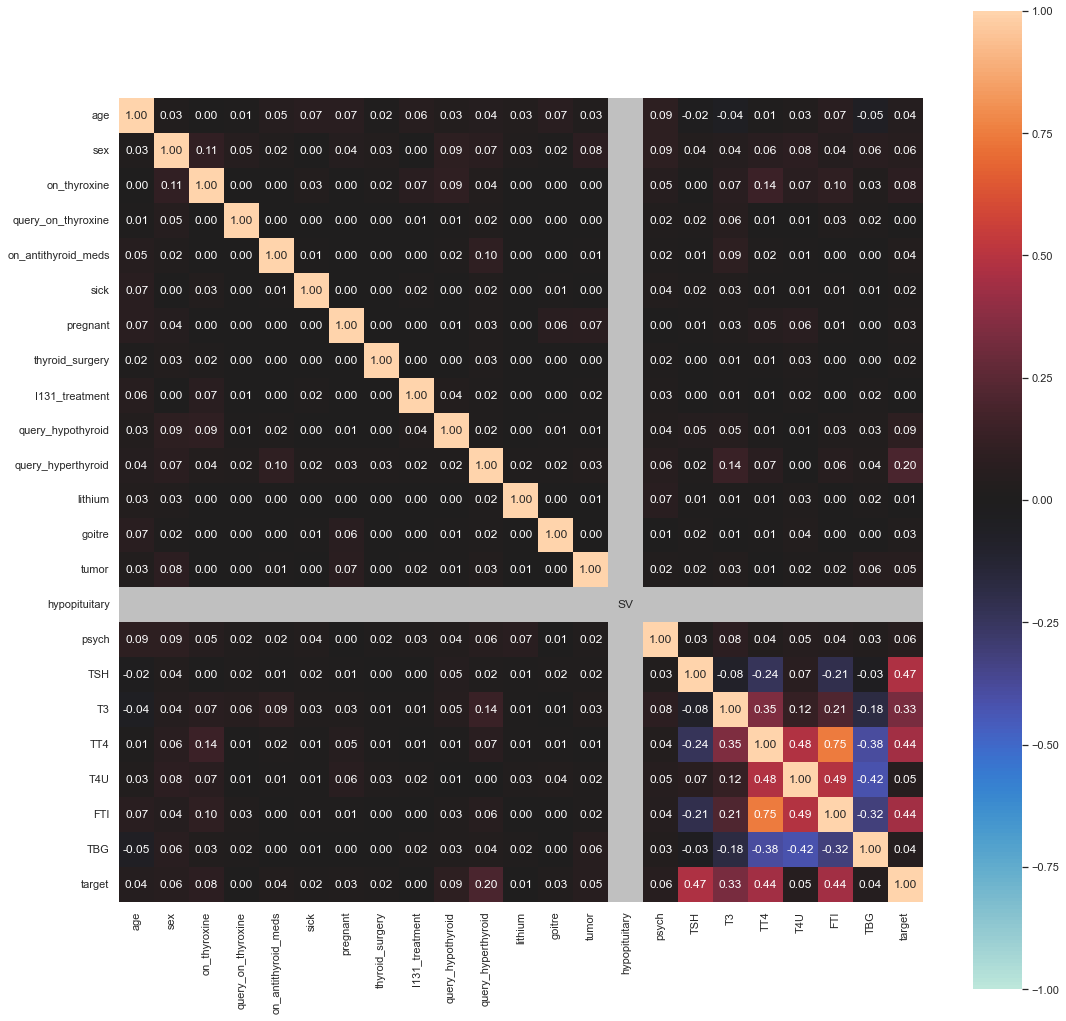

{'corr':                           age       sex  on_thyroxine  query_on_thyroxine  \
 age                  1.000000  0.028867      0.003174            0.011980   
 sex                  0.028867  1.000000      0.106444            0.046954   
 on_thyroxine         0.003174  0.106444      1.000000            0.000000   
 query_on_thyroxine   0.011980  0.046954      0.000000            1.000000   
 on_antithyroid_meds  0.051107  0.024883      0.000000            0.000000   
 sick                 0.070029  0.000000      0.033454            0.000000   
 pregnant             0.069762  0.042721      0.000000            0.000000   
 thyroid_surgery      0.015461  0.032439      0.020547            0.000000   
 I131_treatment       0.059341  0.000000      0.066797            0.007647   
 query_hypothyroid    0.033580  0.088200      0.094460            0.010165   
 query_hyperthyroid   0.043243  0.073691      0.036655            0.023637   
 lithium              0.032997  0.029944      0.000000  

In [6]:
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(thyroidDF)

associations(thyroidDF, 
            nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
            compute_only=False, clustering=False, title=None, filename=None, 
            figsize = (18,18))

Very nice to have all this information about the correlation of all our attributes in the same place. Immediately we confirm our hypothesis that the Hormone tests are the most helpful in our aim to predict target diagnosis. Surprising though that almost no other of our attributes do a good job at predicting our target. We will decide how to move on with this when we analyze a bit more.

**Observations:**
- ndkjnkjdnw
- kajsnxkjasn


### Outlier Detection

The code below calculates the Inter-quartile ranges for our Hormone test numeric attributes in order to determin mild and sever outliers. Depending on the severity of the issue we will decide how to handle them in the next section.

In [7]:
# TSH
Q1_TSH = thyroidDF['TSH'].quantile(0.25)
Q3_TSH = thyroidDF['TSH'].quantile(0.75)
IQR_TSH = Q3_TSH - Q1_TSH
under_TSH = thyroidDF['TSH'] < (Q1_TSH - 3 * IQR_TSH)
upper_TSH = thyroidDF['TSH'] > (Q3_TSH + 3 * IQR_TSH)
print('TSH:', 'under outliers -', sum(under_TSH), ' | upper outliers -', sum(upper_TSH))

# T3
Q1_T3 = thyroidDF['T3'].quantile(0.25)
Q3_T3 = thyroidDF['T3'].quantile(0.75)
IQR_T3 = Q3_T3 - Q1_T3
under_T3 = thyroidDF['T3'] < (Q1_T3 - 3 * IQR_T3)
upper_T3 = thyroidDF['T3'] > (Q3_T3 + 3 * IQR_T3)
print('T3:', 'under outliers -', sum(under_T3), ' | upper outliers -', sum(upper_T3))

# TT4
Q1_TT4 = thyroidDF['TT4'].quantile(0.25)
Q3_TT4 = thyroidDF['TT4'].quantile(0.75)
IQR_TT4 = Q3_TT4 - Q1_TT4
under_TT4 = thyroidDF['TT4'] < (Q1_TT4 - 3 * IQR_TT4)
upper_TT4 = thyroidDF['TT4'] > (Q3_TT4 + 3 * IQR_TT4)
print('TT4:', 'under outliers -', sum(under_TT4), ' | upper outliers -', sum(upper_TT4))

# T4U
Q1_T4U = thyroidDF['T4U'].quantile(0.25)
Q3_T4U = thyroidDF['T4U'].quantile(0.75)
IQR_T4U = Q3_T4U - Q1_T4U
under_T4U = thyroidDF['T4U'] < (Q1_T4U - 3 * IQR_T4U)
upper_T4U = thyroidDF['T4U'] > (Q3_T4U + 3 * IQR_T4U)
print('T4U:', 'under outliers -', sum(under_T4U), ' | upper outliers -', sum(upper_T4U))

# FTI
Q1_FTI = thyroidDF['FTI'].quantile(0.25)
Q3_FTI = thyroidDF['FTI'].quantile(0.75)
IQR_FTI = Q3_FTI - Q1_FTI
under_FTI = thyroidDF['FTI'] < (Q1_FTI - 3 * IQR_FTI)
upper_FTI = thyroidDF['FTI'] > (Q3_FTI + 3 * IQR_FTI)
print('FTI:', 'under outliers -', sum(under_FTI), ' | upper outliers -', sum(upper_FTI))

TSH: under outliers - 0  | upper outliers - 456
T3: under outliers - 0  | upper outliers - 84
TT4: under outliers - 0  | upper outliers - 55
T4U: under outliers - 7  | upper outliers - 22
FTI: under outliers - 0  | upper outliers - 83


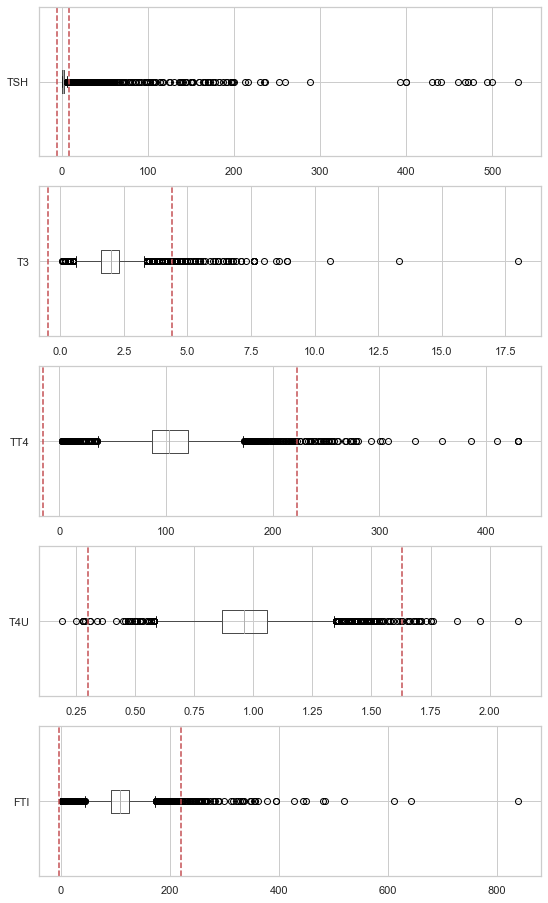

In [8]:
# preparing boxplots
fig, axs= plt.subplots(nrows = 5, figsize=(9,16))

# TSH
thyroidDF.boxplot(column='TSH', ax=axs[0], vert = False)
axs[0].axvline(x=(Q1_TSH - 3*IQR_TSH), color='r', linestyle='--')
axs[0].axvline(x=(Q3_TSH + 3*IQR_TSH), color='r', linestyle='--')
# T3
thyroidDF.boxplot(column='T3', ax=axs[1], vert = False)
axs[1].axvline(x=(Q1_T3 - 3*IQR_T3), color='r', linestyle='--')
axs[1].axvline(x=(Q3_T3 + 3*IQR_T3), color='r', linestyle='--')
# TT4
thyroidDF.boxplot(column='TT4', ax=axs[2], vert = False)
axs[2].axvline(x=(Q1_TT4 - 3*IQR_TT4), color='r', linestyle='--')
axs[2].axvline(x=(Q3_TT4 + 3*IQR_TT4), color='r', linestyle='--')
# T4U
thyroidDF.boxplot(column='T4U', ax=axs[3], vert = False)
axs[3].axvline(x=(Q1_T4U - 3*IQR_T4U), color='r', linestyle='--')
axs[3].axvline(x=(Q3_T4U + 3*IQR_T4U), color='r', linestyle='--')
# FTI
thyroidDF.boxplot(column='FTI', ax=axs[4], vert = False)
axs[4].axvline(x=(Q1_FTI - 3*IQR_FTI), color='r', linestyle='--')
axs[4].axvline(x=(Q3_FTI + 3*IQR_FTI), color='r', linestyle='--')

It seems that we have many severe outliers present. However, given our research about these values, this type of variance is normal within this context and is to be expected, especially when dealing with persons who will have alterations in these  values given their medical conditions. We have done a run where we treated these outliers by either removal or imputation and obtained significantly worse results. Thus we have determined that the variance present is part of the normal behavior of the dataset.

---
## Preprocessing

### Handling Missing Values

First we will do some calculations to determine the severity of our missing value problem. The custom function below takes a dataframe as input and keeps a tally of missing values per column, then calculates the percentage of missing values in that column and summarizes the information in an output dataframe that is easy for us to viasualize.

- The overall missingess of our dataset is 7.54%
    - This seems worrying at first but most of that bulk is because of the TBG column which is almost entirely empty. We knew we were dropping this from the start of the analysis but have kept it for exploration purposes. Now it is time to go for it.
- `T3` is second most missing column at 29.3% 
    - This is a lot of missing data and it might be adviseable to remove but the column is too important for our analysis (we have also done separate research that has reiterated that T3 is a very important predictor for thyroid disease). We will try to impute this information moving forward.
- `TSH` is third most missing column at 9.56% missing
    - This is a good candidate for imputation moving forward
- `FTI` is our fourth most missing column at 8.86% missing
    - This is also a good candidate for imputation
- `TT4` is our fifth most missing column at 4.69% missing
    - Once again a good candidate for imputation
- `sex` is our sixth most missing column at 3.31% missing
    - We will determine what to do with sex later on
        - depending on how important it is to keep in our dataset for modeling purposes we will attempt to impute
- `age` has 4 missing values
    - we created these values by removing the inconsistent (very large) age for these observation
        - we determined we can go ahead and drop these observations without impacting our analysis

**Observations:**
-  It doesnt seem lke a coincidence that most missing values present are from blood tests
    - We need to investigate this further in order to decide the best approach to handling them
        - Are they not there because they weren't properly recorded or because they were never ordered to be taken (deemed not necessary by doctors)?

In [9]:
# calculating missingess of entire DF
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(thyroidDF)

Overall Missingness of thyroidDF is: 7.54%


,Total,Percent
TBG,7287,0.965677
T3,2209,0.292738
TSH,722,0.095680
T4U,676,0.089584
FTI,669,0.088656
TT4,354,0.046912
sex,250,0.033130
age,4,0.000530
goitre,0,0.000000
psych,0,0.000000


### Missing Table Summary

**thyroidDF[`'TBG'`]** – 96.56% missing
- The 'TBG' attribute is almost entirely missing from the dataset. This column will be removed at once!

**thyroidDF[`'age'`]** – 0.045% missing
- We will also go ahead and drop these 4 observations from the dataset. All 4 of these observations belong to observations with 'target' == 'negative'

**thyroidDF[`'Sex'`]** – 3.37% missing
- There are a total of 300 observations where 'sex' is null. In an attempt to preserve some of these values, we check how many of these observations also have 'pregnant' == True. There are 3 such observations. Assuming the 'pregnancy' attribute is correct for these observations, we can confidently say these 3 observations belong to women and can change their respective values.

In [10]:
# dropping 'TBG' attribute from dataset
thyroidDF.drop(['TBG'], axis=1, inplace=True)

# dropping 4 observations with abnormal 'age' from dataset
thyroidDF.dropna(subset=['age'], inplace=True)

# changing sex of observations with ('pregnant' == True) & ('sex' == null) to Female
thyroidDF['sex'] = np.where((thyroidDF.sex.isnull()) & (thyroidDF.pregnant == 't'), 'F', thyroidDF.sex)

Now lets take a look at missing values per row. If we are moving forward with imputation, we dont want to keep rows that have too many missing values (especially since most missing values in the dataset are from the most important attributes). 

<AxesSubplot:>

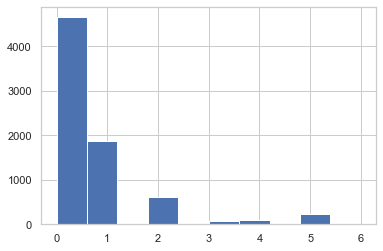

In [11]:
# count missing values per row
thyroidDF['n_missing'] = thyroidDF.isnull().sum(axis=1)
thyroidDF['n_missing'].hist()

It looks like after removing `TBG` from the dataset, most of the observations in our dataset have zero missing values. A lot have one missing value and some have two. a minority have 3 or more. Before we do any imputation we will remove the observations that are missing data for more than 2 columns. This is because we dont want to make up observations alltogether. We do this removal in the code below, as well as generate a final table for missing values after we handled most of them.

We are now at only 2.89% missing data throughout the dataset overall!

In [12]:
# calculating missingess of entire DF
missingness = thyroidDF.isnull().sum().sum() / thyroidDF.count().sum()
print('Overall Missingness of thyroidDF is: {:.2f}%'.format(missingness * 100))

# remove rows with 3 or more missing values
thyroidDF.drop(thyroidDF.index[thyroidDF['n_missing'] > 2], inplace=True)
print
missing_table(thyroidDF)

Overall Missingness of thyroidDF is: 2.89%


,Total,Percent
T3,1910,0.267432
TSH,406,0.056847
T4U,290,0.040605
FTI,283,0.039625
sex,208,0.029123
TT4,6,0.000840
age,0,0.000000
goitre,0,0.000000
target,0,0.000000
psych,0,0.000000


### Imputation with MICE

In order to impute missing data with MICE it must be Missing at Random (MAR). During our Exploratory Data Analysis we determined that all hormone test attributes are correlated with one another. This is good news because it means we can use MICE to attempt to impute these missing values to a larger degree of success. Also, after removing observations with more than two missing values from our dataset, it appears that the leftover observations with missing data are not MNAR.

The code below first replaces all occurences of 't' or 'f' with 1 or 0 respectively. This is one-hot encoding our dataset in order to turn all boolean attributes into numerical. This is necessary for mice to be able to impute the wanted numerical variables. And this will also be necessary later on when we use this dataset for some of our models.

Then we call on some sklearn methods in order to apply MICE imputation (at this point it is still experimental in sklearn). We also map our target values to numeric and specify to the imputer that the target class is qualitative. Then we re-map back to our target names in order to enhance further visualizations.

In [13]:
# replacing boolean strings with binary 0 and 1
thyroidDF.replace('f', 0, inplace=True)
thyroidDF.replace('t', 1, inplace=True)

# replacing sex with binary 0 and 1
thyroidDF.replace('M', 0, inplace=True) # male mapped to 0
thyroidDF.replace('F', 1, inplace=True) # female mapped to 1

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# re-mapping target vaues to diagnostic groups
diagnoses = {'negative': 0,
                'hyper': 1, 
                'hypo': 2}

mice_df = thyroidDF.copy()
mice_df['target'] = mice_df['target'].map(diagnoses) # re-mapping

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), 
                                max_iter=30, 
                                n_nearest_features=None, 
                                imputation_order='ascending',
                                min_value=0,
                                random_state=42)

mice_thyroidDF = pd.DataFrame(mice_imputer.fit_transform(mice_df), columns=mice_df.columns)

# re-mapping target vaues to diagnostic groups
diagnoses = {0: 'negative',
                1: 'hyper', 
                2: 'hypo'}

mice_thyroidDF['target'] = mice_thyroidDF['target'].map(diagnoses) # re-mapping

Now that we have imputed our data, lets check our attribute distributions to visually inspect if we have made improvements or if something looks off!

<AxesSubplot:xlabel='target', ylabel='FTI'>

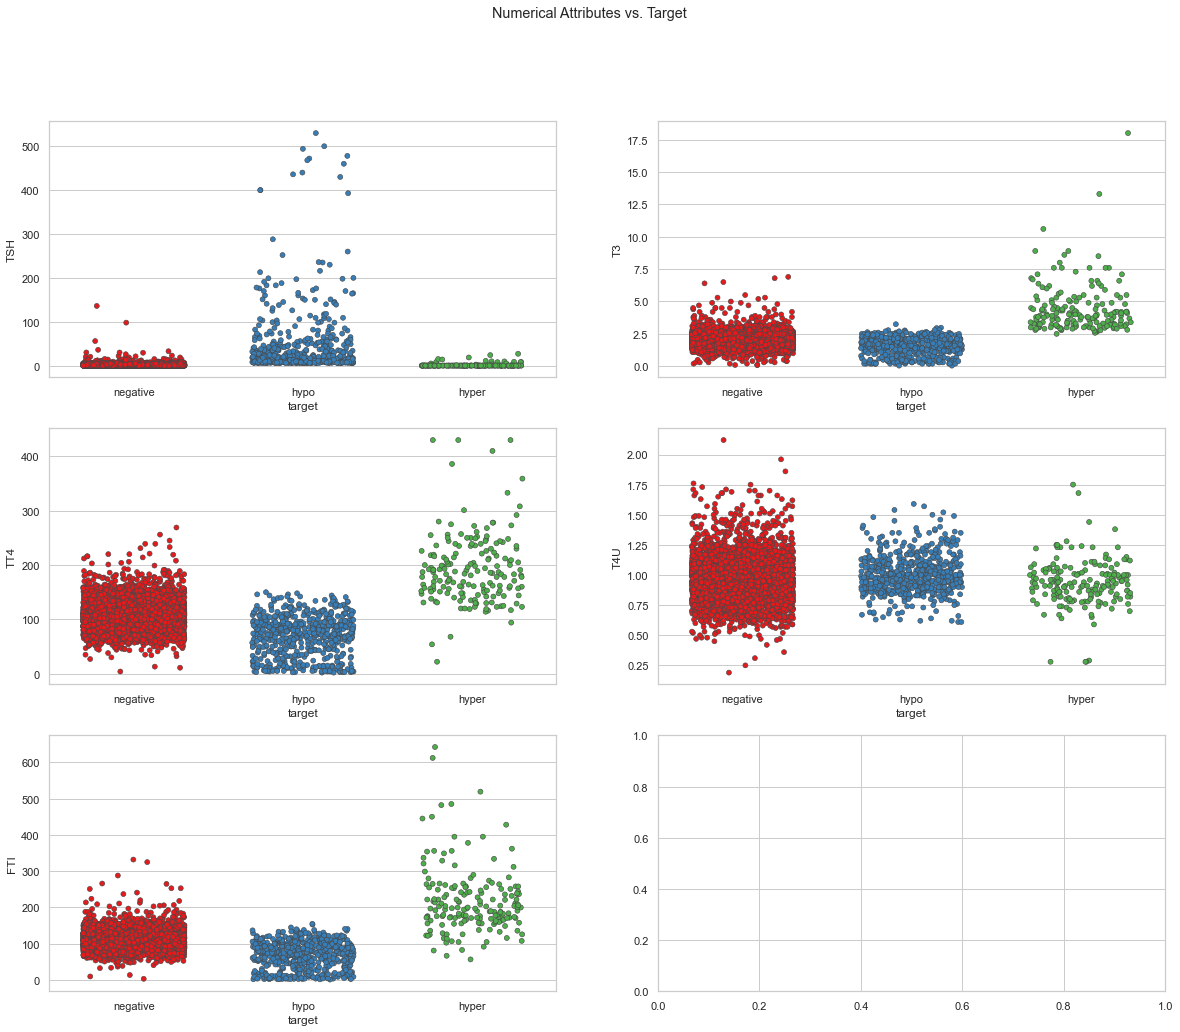

In [15]:
# Analyze missing data
missing_table(mice_thyroidDF)

# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_theme(style='ticks')

# TSH vs. 'target'
sns.stripplot(x=mice_thyroidDF.target, y=mice_thyroidDF.TSH, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=mice_thyroidDF.target, y=mice_thyroidDF.T3, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=mice_thyroidDF.target, y=mice_thyroidDF.TT4, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=mice_thyroidDF.target, y=mice_thyroidDF.T4U, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=mice_thyroidDF.target, y=mice_thyroidDF.FTI, palette='Set1', linewidth=0.6, jitter= 0.3, ax=axes[2, 0])

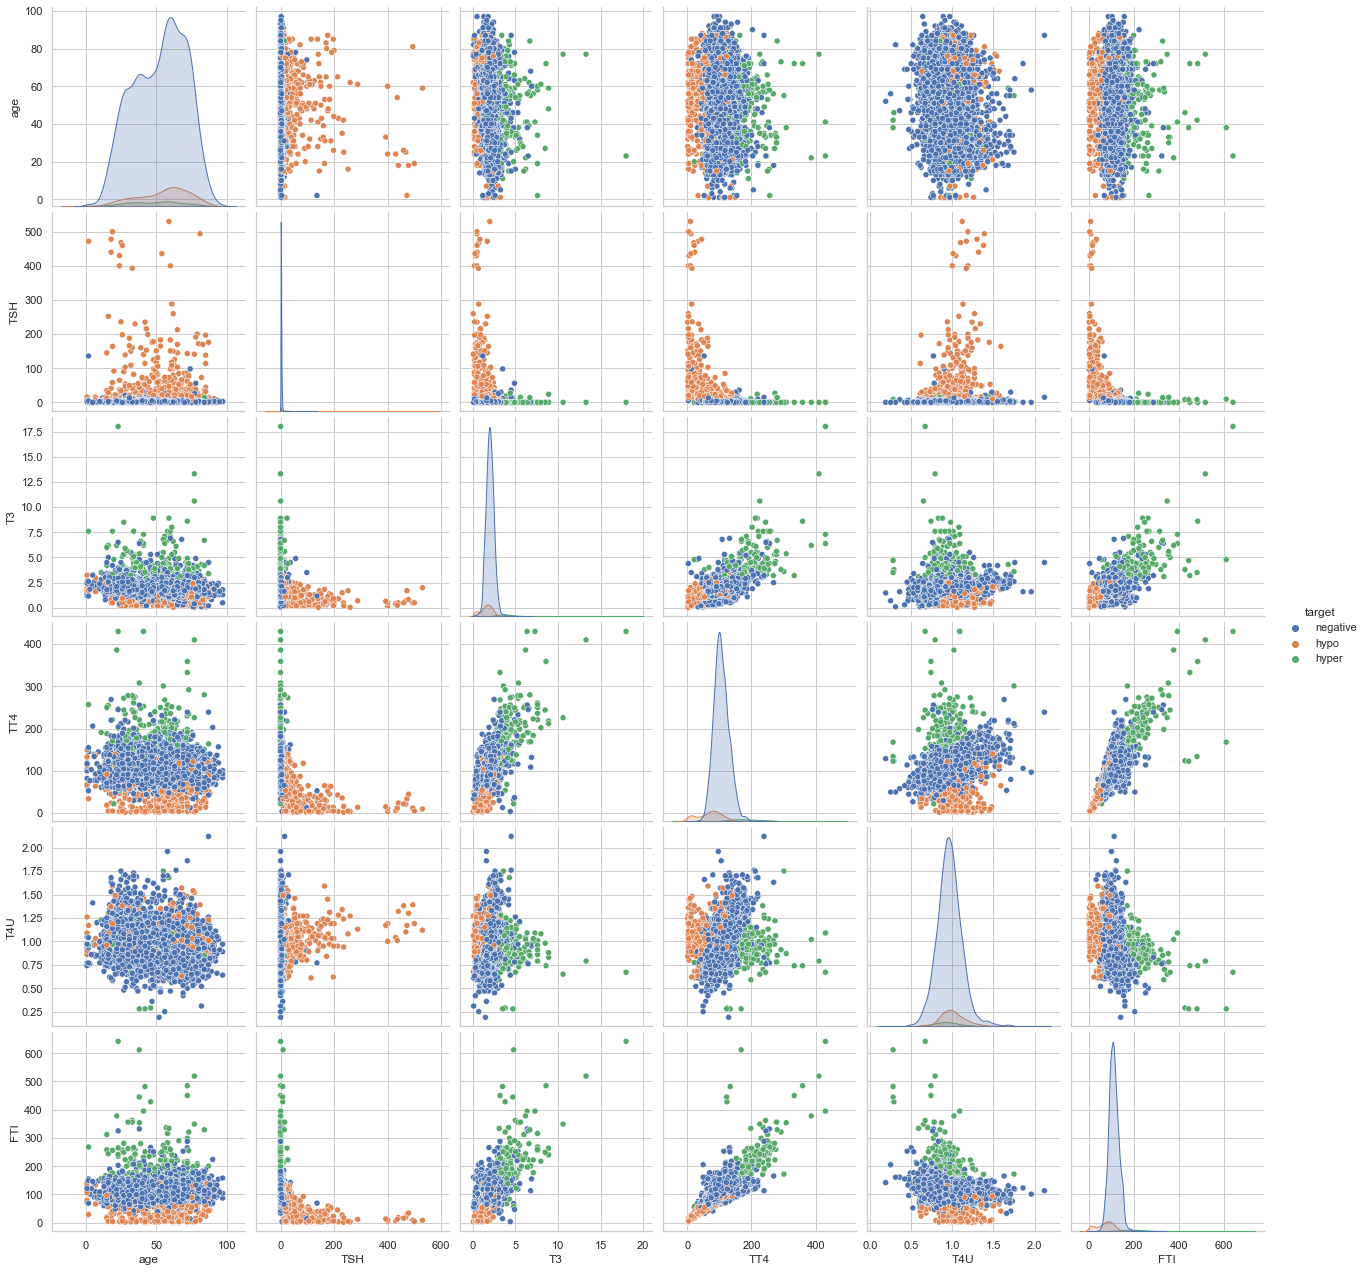

In [16]:
mice_numericalDF = mice_thyroidDF[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid');
sns.pairplot(mice_numericalDF, hue='target', height=3);
plt.show()

The data distributions still look quite lovely after imputation. Not much has changed which is a good sign. It means that our imputation did a good job at imitating the existing distribution of the data. Clusters are still visibe within some variables adn they will be useful for our models moving forward!

---
## KNN Classifier

For our first model we will attempt to predict the target classes using KNN. This is a popular model and is easy to apply. It will give us a good baseline to work with and try to improve. The code below takes the DF produced by mice imputation and performs `stratified train test split.`
This is important because since our dataset is extremely unbalanced, it will ensure that we have the same ratio of target classes in our train and test dataset. Thus allowing us to train and validate without being overly confident or underperforming.

**Results:**

- The model seems to perform well at 95% accuracy but when we look closer we can see that it does not do a good job at predicting hypothyroid or hyperthyroid, only negative targets. This is what we expected given the unbalanced nature of our data. What will help the most with this issue is to perform resampling using and advanced technique like `SMOTE`. For this we use `imblearn` package for python.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


knnDF = mice_thyroidDF.drop(['pregnant', 'sick', 'lithium', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'on_antithyroid_meds', 'query_on_thyroxine', 'psych', 'n_missing', 'I131_treatment'], axis=1)

X = knnDF.drop('target', axis=1).copy()
y = knnDF['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

y_pred = clf_knn.predict(X_test) # These are the predicted output values

result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n')
print(result)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report: \n') 
print(classification_report(y_test, y_pred))

Confusion Matrix: 

[[  30    0   14]
 [   0   81   64]
 [   6    4 1587]]

Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.91
Macro Recall: 0.74
Macro F1-score: 0.81

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report: 

              precision    recall  f1-score   support

       hyper       0.83      0.68      0.75        44
        hypo       0.95      0.56      0.70       145
    negative       0.95      0.99      0.97      1597

    accuracy                           0.95      1786
   macro avg       0.91      0.74      0.81      1786
weighted avg       0.95      0.95      0.95      1786



## SVC Classifier

For our second model we try SVC which is a Support Vector Machine classifier. A ver popular choice for this type of data. 

We encounter the same problems as with KNN. The severe imbalance produces a good overall accuracy but terrible prediction of our minority classes. This will also be aided by resampling with `SMOTE`.

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# SVC classifier base run
#svcDF = mice_thyroidDF.drop(mice_thyroidDF.index[(mice_thyroidDF['target'] != 'negative') & (mice_thyroidDF['target'] != 'hyper') & (mice_thyroidDF['target'] != 'hypo')])
svcDF = mice_thyroidDF.copy()

X = svcDF.drop('target', axis=1).copy()
y = svcDF['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

svc = SVC(kernel='rbf', C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Confusion Matrix

[[  22    0   22]
 [   0   68   77]
 [   4    5 1588]]

Accuracy: 0.94

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94

Macro Precision: 0.91
Macro Recall: 0.65
Macro F1-score: 0.74

Weighted Precision: 0.94
Weighted Recall: 0.94
Weighted F1-score: 0.93

Classification Report

              precision    recall  f1-score   support

       hyper       0.85      0.50      0.63        44
        hypo       0.93      0.47      0.62       145
    negative       0.94      0.99      0.97      1597

    accuracy                           0.94      1786
   macro avg       0.91      0.65      0.74      1786
weighted avg       0.94      0.94      0.93      1786



## XGBoost Classifier

For the next model we decide to go with XGBoost. XGBoost has some amazing properties that make it extremely suitable for our data. 
- It can natively handle missing values in data as long as we encode them with 0.
- It does a great job at handling severe imbalance of classes
    - especially with its `scale_pos_weight` hyperparameter
- It can select the most important features needed during training and uses those for its tree building
    - This is especially helpful to us as a feature selection strategy
        - We already know what the most important features for our model are since we discovered them during EDA but hopefully this models output will reiterate our belief.

**results:**
- right out of the bat XGBoost excels
    - even by feeding it the unimputed dataset with null values set to 0 it does a better job than the other models at predicting our minoriry class as well as the maority class

This is a great start but we can do better. Lets use GridSearchCV to test the best hyperparameters for our model!


[0]	validation_0-merror:0.00616	validation_0-mlogloss:0.70999	validation_1-merror:0.01176	validation_1-mlogloss:0.71447
[1]	validation_0-merror:0.00448	validation_0-mlogloss:0.49000	validation_1-merror:0.01176	validation_1-mlogloss:0.49815
[2]	validation_0-merror:0.00373	validation_0-mlogloss:0.34853	validation_1-merror:0.01176	validation_1-mlogloss:0.36031
[3]	validation_0-merror:0.00317	validation_0-mlogloss:0.25240	validation_1-merror:0.01176	validation_1-mlogloss:0.26730
[4]	validation_0-merror:0.00261	validation_0-mlogloss:0.18514	validation_1-merror:0.01176	validation_1-mlogloss:0.20278
[5]	validation_0-merror:0.00205	validation_0-mlogloss:0.13736	validation_1-merror:0.01176	validation_1-mlogloss:0.15708
[6]	validation_0-merror:0.00131	validation_0-mlogloss:0.10282	validation_1-merror:0.01176	validation_1-mlogloss:0.12503
[7]	validation_0-merror:0.00112	validation_0-mlogloss:0.07751	validation_1-merror:0.01176	validation_1-mlogloss:0.10133
[8]	validation_0-merror:0.00093	validati

/Users/efwerr/miniforge3/envs/ml_env/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/efwerr/miniforge3/envs/ml_env/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-merror:0.00000	validation_0-mlogloss:0.00465	validation_1-merror:0.01120	validation_1-mlogloss:0.04355
[22]	validation_0-merror:0.00000	validation_0-mlogloss:0.00416	validation_1-merror:0.01064	validation_1-mlogloss:0.04372
[23]	validation_0-merror:0.00000	validation_0-mlogloss:0.00375	validation_1-merror:0.01120	validation_1-mlogloss:0.04407
[24]	validation_0-merror:0.00000	validation_0-mlogloss:0.00344	validation_1-merror:0.01176	validation_1-mlogloss:0.04446
[25]	validation_0-merror:0.00000	validation_0-mlogloss:0.00318	validation_1-merror:0.01232	validation_1-mlogloss:0.04442
[26]	validation_0-merror:0.00000	validation_0-mlogloss:0.00296	validation_1-merror:0.01288	validation_1-mlogloss:0.04454
[27]	validation_0-merror:0.00000	validation_0-mlogloss:0.00278	validation_1-merror:0.01232	validation_1-mlogloss:0.04466
[28]	validation_0-merror:0.00000	validation_0-mlogloss:0.00263	validation_1-merror:0.01232	validation_1-mlogloss:0.04501
[29]	validation_0-merror:0.00000

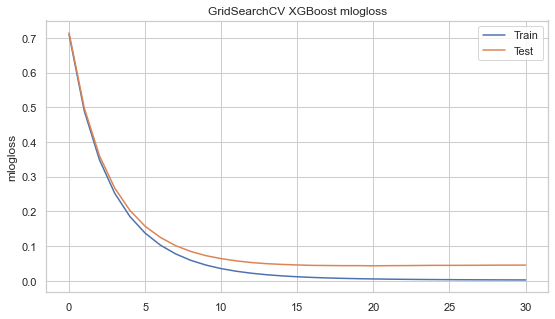

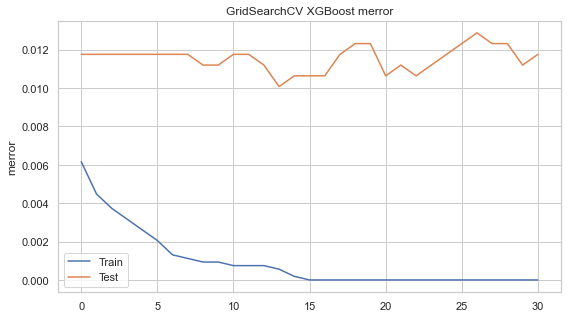

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, get_scorer_names

xgbDF = thyroidDF.replace(np.nan, 0)

# re-mapping target vaues to diagnostic groups
diagnoses = {'negative': 0,
                'hyper': 1, 
                'hypo': 2}

xgbDF['target'] = xgbDF['target'].map(diagnoses) # re-mapping

# xgboost classifier base run
X = xgbDF.drop('target', axis=1).copy()
y = xgbDF['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

clf_xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3, missing=1, seed=42)
clf_xgb.fit(X_train, 
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric=['merror','mlogloss'],
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()


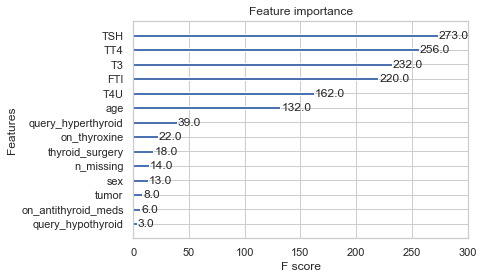

In [20]:
from xgboost import plot_importance

fig, ax = plt.subplots()
plot_importance(clf_xgb, ax=ax)
plt.show()

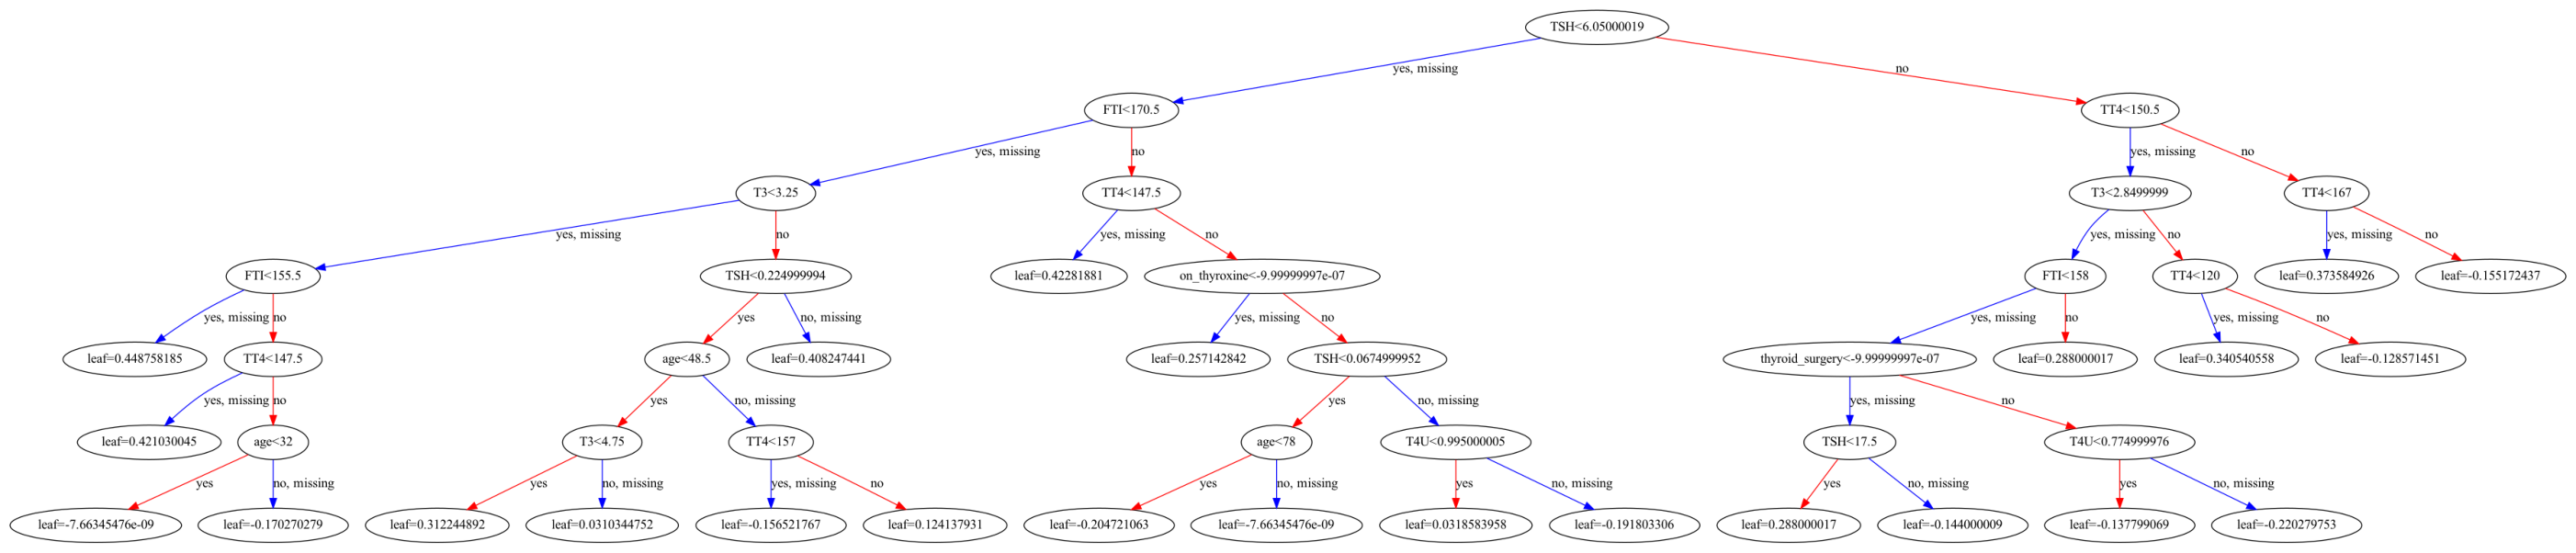

In [21]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 50,20
xgb.plot_tree(clf_xgb)
plt.show()

In [22]:
y_pred = clf_xgb.predict(X_test)

print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Confusion Matrix

[[1585    7    5]
 [   6   38    0]
 [   1    0  144]]

Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.94
Macro Recall: 0.95
Macro F1-score: 0.94

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1597
           1       0.84      0.86      0.85        44
           2       0.97      0.99      0.98       145

    accuracy                           0.99      1786
   macro avg       0.94      0.95      0.94      1786
weighted avg       0.99      0.99      0.99      1786



### GridSearchCV Optimization for XGBoost Classifier

GridSearchCV below is testing all given hyperparameter combinations set below and creating a summary of results for each. It takes a long time and thus has been commented out to turn in the assignment so that the grader doesnt run it by mistake when reviewing the work. we have taken the top combination and used it to input to our model.

In [23]:
# commmented-out to prevent it from running while graders a reviewing this work
# the output of the GridSearch is already used in the cell below to fit a new xgb model

'''
## ROUND 1
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1,3,5]
}

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective='multi:softmax', num_class=3, missing=None, seed=42),
    param_grid=param_grid,
    scoring='f1',
    verbose=0,
    n_jobs = 10,
    cv = 3
)

xgb_CV = optimal_params.fit(X_train, y_train)

for i in pd.DataFrame(xgb_CV.cv_results_).sort_values('rank_test_score')['params'].head():
    print(i)
'''

"\n## ROUND 1\nparam_grid = {\n    'max_depth': [3, 4, 5],\n    'learning_rate': [0.1, 0.01, 0.05],\n    'gamma': [0, 0.25, 1.0],\n    'reg_lambda': [0, 1.0, 10.0],\n    'scale_pos_weight': [1,3,5]\n}\n\noptimal_params = GridSearchCV(\n    estimator = xgb.XGBClassifier(objective='multi:softmax', num_class=3, missing=None, seed=42),\n    param_grid=param_grid,\n    scoring='f1',\n    verbose=0,\n    n_jobs = 10,\n    cv = 3\n)\n\nxgb_CV = optimal_params.fit(X_train, y_train)\n\nfor i in pd.DataFrame(xgb_CV.cv_results_).sort_values('rank_test_score')['params'].head():\n    print(i)\n"

Now tha we have the best ranking hyperparameter combination lets input that in our model. The correct thing would be to try two or more separate hyperparameter combinations given the directions that the outputs are pointing in given our inital combinations list for gridsearch. But we will go ahead and try these to see how the model performs.

[23:11:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.01307	validation_0-mlogloss:0.96075	validation_1-merror:0.01344	validation_1-mlogloss:0.96118
[1]	validation_0-merror:0.01270	validation_0-mlogloss:0.84643	validation_1-merror:0.01288	validation_1-mlogloss:0.84752
[2]	validation_0-merror:0.01251	validation_0-mlogloss:0.74988	validation_1-merror:0.01344	validation_1-mlogloss:0.75170
[3]	validation_0-merror:0.01251	validation_0-mlogloss:0.66722	validation_1-merror:0.01288	validation_1-mlogloss:0.66927
[4]	validation_0-merror:0.01232	validation_0-mlogloss:0.59607	val

/Users/efwerr/miniforge3/envs/ml_env/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/efwerr/miniforge3/envs/ml_env/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-merror:0.01008	validation_0-mlogloss:0.08156	validation_1-merror:0.01344	validation_1-mlogloss:0.09299
[28]	validation_0-merror:0.01008	validation_0-mlogloss:0.07664	validation_1-merror:0.01344	validation_1-mlogloss:0.08844
[29]	validation_0-merror:0.01008	validation_0-mlogloss:0.07218	validation_1-merror:0.01400	validation_1-mlogloss:0.08426
[30]	validation_0-merror:0.01008	validation_0-mlogloss:0.06817	validation_1-merror:0.01344	validation_1-mlogloss:0.08069
[31]	validation_0-merror:0.01008	validation_0-mlogloss:0.06446	validation_1-merror:0.01400	validation_1-mlogloss:0.07714
[32]	validation_0-merror:0.00990	validation_0-mlogloss:0.06116	validation_1-merror:0.01344	validation_1-mlogloss:0.07411
[33]	validation_0-merror:0.00990	validation_0-mlogloss:0.05811	validation_1-merror:0.01344	validation_1-mlogloss:0.07135
[34]	validation_0-merror:0.00990	validation_0-mlogloss:0.05535	validation_1-merror:0.01344	validation_1-mlogloss:0.06888
[35]	validation_0-merror:0.01008

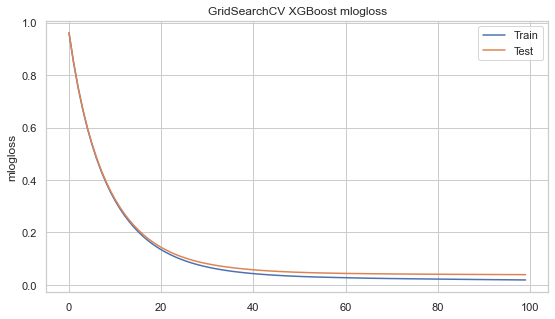

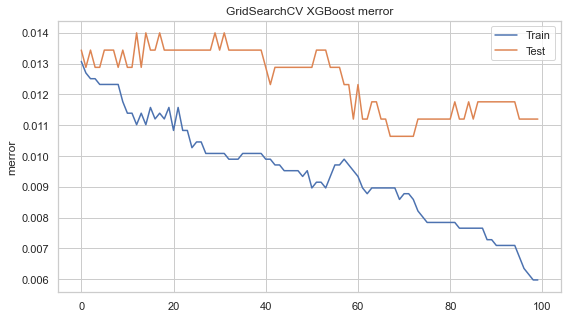

In [24]:
# xgboost classifier after GridSearchCV
scale_pos_weight = y_train[y_train == 0].count() / y_train[y_train != 0].count()

clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='multi:softmax', 
                        num_class=3, 
                        missing=1,
                        gamma=0,
                        learning_rate=0.1,
                        max_depth=3,
                        reg_lambda=10,
                        scale_pos_weight=scale_pos_weight)
clf_xgb.fit(X_train, 
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric=['merror','mlogloss'],
            eval_set=[(X_train, y_train), (X_test, y_test)])

# preparing evaluation metric plots
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

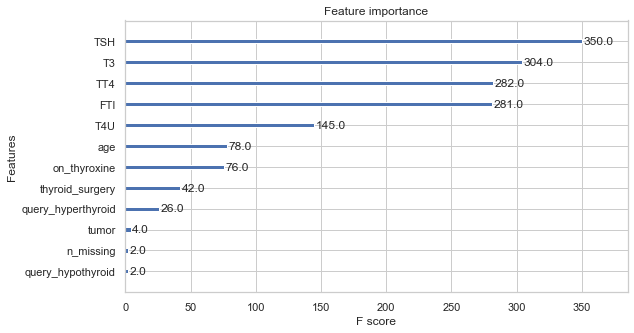

In [25]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(clf_xgb, ax=ax)
plt.show()

In [26]:
y_pred = clf_xgb.predict(X_test)

print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred))

Confusion Matrix

[[1585    4    8]
 [   7   37    0]
 [   1    0  144]]

Accuracy: 0.99

Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.95
Macro Recall: 0.94
Macro F1-score: 0.94

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1597
           1       0.90      0.84      0.87        44
           2       0.95      0.99      0.97       145

    accuracy                           0.99      1786
   macro avg       0.95      0.94      0.94      1786
weighted avg       0.99      0.99      0.99      1786



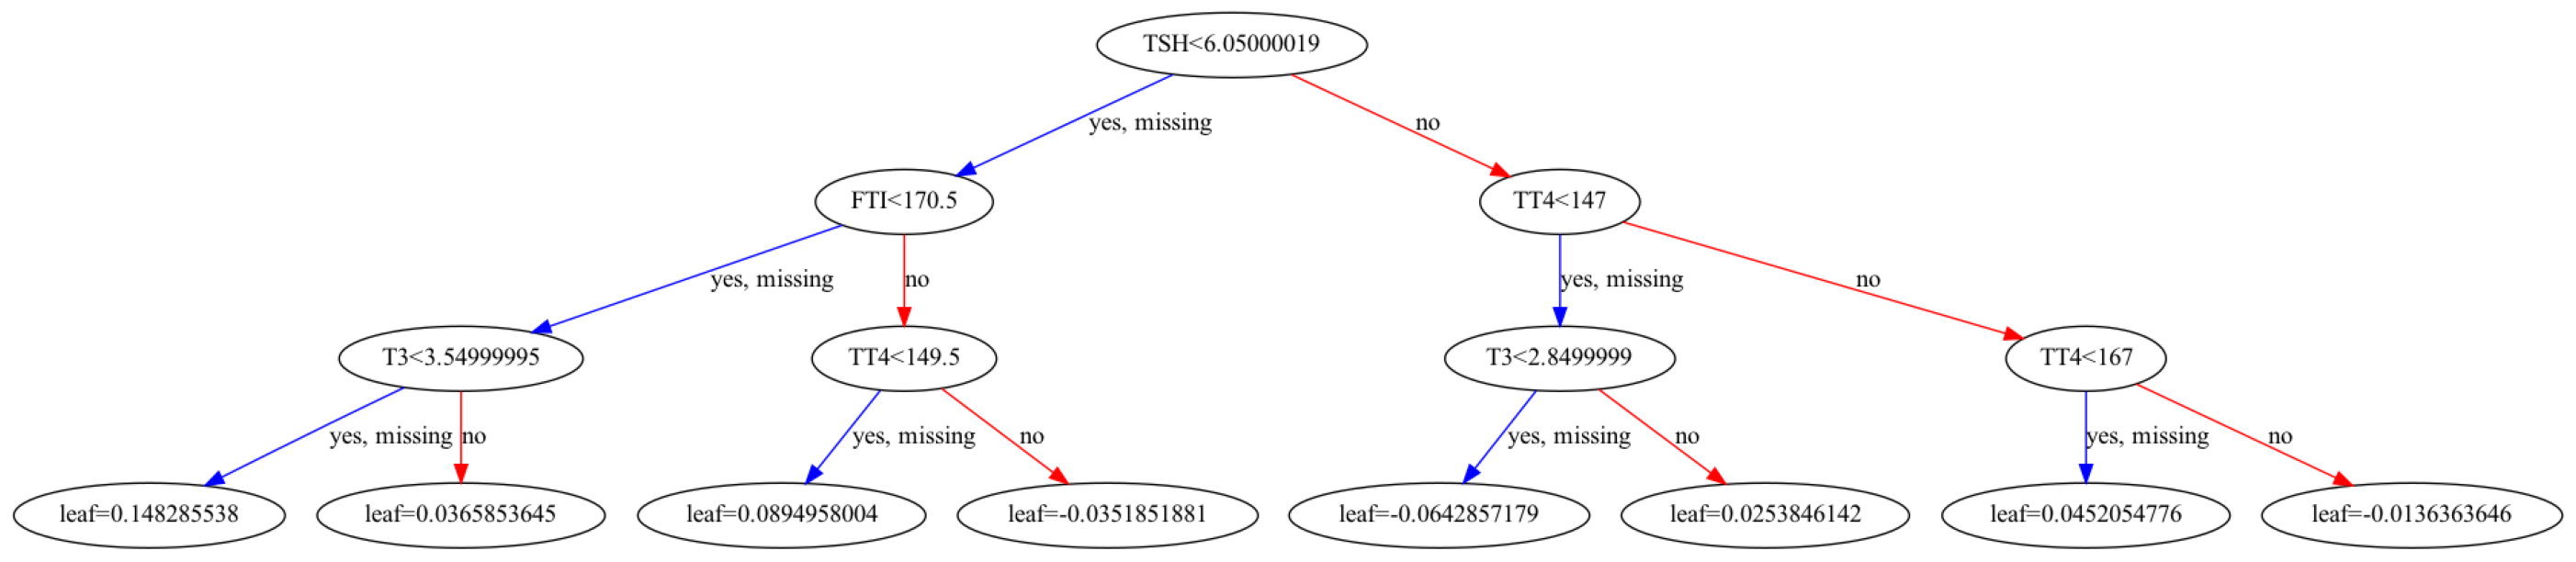

In [27]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 50,20
xgb.plot_tree(clf_xgb)
plt.show()

Above we can see the tree that the XGBoost model created when training and uses for prediction. It pretty much summarizes our initial assumptions about important variables for modeling.

Initially we were quite skeptical of the results of the XGBoost model but after checking everything and performing more tests we can confirm that the results are valid. They would be even better at predicting our minority class if we were able to use the `scale_pos_weight` hyperparamter but our environment is acting up and xgboost says it wont use it. This is probably because of multiclass classification instead of binary class.